In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/wiki/List_of_best-selling_books'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
books = []
authors = []
languages = []
first_published = []
approx_sales = []
genres = []
tables = soup.find_all('table', class_='wikitable')
for table in tables:
    rows = table.find_all('tr')[1:] 
    for row in rows:
        cells = row.find_all('td')        
        if len(cells) >= 6:
            book_title = cells[0].text.strip()
            author_name = cells[1].text.strip()
            language = cells[2].text.strip()
            published_year = cells[3].text.strip()
            sales = cells[4].text.strip()
            genre = cells[5].text.strip()
            books.append(book_title)
            authors.append(author_name)
            languages.append(language)
            first_published.append(published_year)
            approx_sales.append(sales)
            genres.append(genre)
        else:            
            print(f"Issue with row: {row}")
book_data = pd.DataFrame({
    'Book': books,
    'Author': authors,
    'Original Language': languages,
    'First Published': first_published,
    'Approximate Sales': approx_sales,
    'Genre': genres
})
output_file = 'best_selling_books_combined.csv'
book_data.to_csv(output_file, index=False)

Issue with row: <tr>
<td><i><a href="/wiki/A_Wrinkle_in_Time" title="A Wrinkle in Time">A Wrinkle in Time</a></i></td>
<td><a href="/wiki/Madeleine_L%27Engle" title="Madeleine L'Engle">Madeleine L'Engle</a></td>
<td>English</td>
<td>1962</td>
<td>14 million<sup class="reference" id="cite_ref-143"><a href="#cite_note-143">[143]</a></sup>
</td></tr>
Issue with row: <tr>
<td><i><a href="/wiki/The_Old_Man_and_the_Sea" title="The Old Man and the Sea">The Old Man and the Sea</a></i></td>
<td><a href="/wiki/Ernest_Hemingway" title="Ernest Hemingway">Ernest Hemingway</a></td>
<td>English</td>
<td>1952</td>
<td>13 million<sup class="reference" id="cite_ref-compuart.ru_64-5"><a href="#cite_note-compuart.ru-64">[64]</a></sup>
</td></tr>
Issue with row: <tr>
<td><i><a href="/wiki/No_Longer_Human" title="No Longer Human">No Longer Human</a></i> (人間失格)</td>
<td><a href="/wiki/Osamu_Dazai" title="Osamu Dazai">Osamu Dazai</a></td>
<td>Japanese</td>
<td>1948</td>
<td>12 million<sup class="reference" id

In [39]:
import pandas as pd
csv_file = 'best_selling_books_combined.csv'
df = pd.read_csv(csv_file)
print(df)

                                         Book                    Author  \
0                        A Tale of Two Cities           Charles Dickens   
1         The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2                The Alchemist (O Alquimista)              Paulo Coelho   
3    Harry Potter and the Philosopher's Stone             J. K. Rowling   
4                    And Then There Were None           Agatha Christie   
..                                        ...                       ...   
284         The No. 1 Ladies Detective Agency    Alexander McCall Smith   
285        Der Regenbogenfisch (Rainbow Fish)            Marcus Pfister   
286                         The Riftwar Cycle          Raymond E. Feist   
287                        The Thrawn trilogy              Timothy Zahn   
288                    Wiedźmin (The Witcher)         Andrzej Sapkowski   

    Original Language First Published        Approximate Sales  \
0             English            

In [40]:
df.head()

,Book,Author,Original Language,First Published,Approximate Sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,>200 million[20],Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200 million[21][22][23],"Fantasy, Children's fiction"
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,1988,150 million[24][25],Fantasy
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[26][27],"Fantasy, Children's fiction"
4,And Then There Were None,Agatha Christie,English,1939,100 million[28],Mystery


In [41]:
import re


def extract_first_numeric_value(text):
   
    match = re.search(r'\d+', str(text)) 
    if match:
        return int(match.group(0))  
    else:
        return None  
df['Approximate Sales'] = df['Approximate Sales'].apply(extract_first_numeric_value)

# Display the updated DataFrame
print(df)


                                         Book                    Author  \
0                        A Tale of Two Cities           Charles Dickens   
1         The Little Prince (Le Petit Prince)  Antoine de Saint-Exupéry   
2                The Alchemist (O Alquimista)              Paulo Coelho   
3    Harry Potter and the Philosopher's Stone             J. K. Rowling   
4                    And Then There Were None           Agatha Christie   
..                                        ...                       ...   
284         The No. 1 Ladies Detective Agency    Alexander McCall Smith   
285        Der Regenbogenfisch (Rainbow Fish)            Marcus Pfister   
286                         The Riftwar Cycle          Raymond E. Feist   
287                        The Thrawn trilogy              Timothy Zahn   
288                    Wiedźmin (The Witcher)         Andrzej Sapkowski   

    Original Language First Published  Approximate Sales  \
0             English            1859  

In [42]:
df.head()

,Book,Author,Original Language,First Published,Approximate Sales,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200,"Fantasy, Children's fiction"
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,1988,150,Fantasy
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,"Fantasy, Children's fiction"
4,And Then There Were None,Agatha Christie,English,1939,100,Mystery


## Feature Generation

In [43]:
import datetime

df["First Published"] = pd.to_datetime(df["First Published"], errors='coerce')  # Handle potential errors
df["Age of Book"] = datetime.datetime.now().year - df["First Published"].dt.year


In [44]:
df.head()

,Book,Author,Original Language,First Published,Approximate Sales,Genre,Age of Book
0,A Tale of Two Cities,Charles Dickens,English,1859-01-01,200,Historical fiction,165.0
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943-01-01,200,"Fantasy, Children's fiction",81.0
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,1988-01-01,150,Fantasy,36.0
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997-01-01,120,"Fantasy, Children's fiction",27.0
4,And Then There Were None,Agatha Christie,English,1939-01-01,100,Mystery,85.0


In [45]:
df.drop("First Published", axis=1, inplace=True)

In [46]:
df.head()

,Book,Author,Original Language,Approximate Sales,Genre,Age of Book
0,A Tale of Two Cities,Charles Dickens,English,200,Historical fiction,165.0
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,200,"Fantasy, Children's fiction",81.0
2,The Alchemist (O Alquimista),Paulo Coelho,Portuguese,150,Fantasy,36.0
3,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,120,"Fantasy, Children's fiction",27.0
4,And Then There Were None,Agatha Christie,English,100,Mystery,85.0


In [47]:
df.shape

(289, 6)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  
bins = [30,60,90,120,150,180 ,df_encoded["Age of Book"].max() + 1]  
df_encoded["Age_Category"] = pd.cut(df_encoded["Age of Book"], bins=bins, labels=[str(b) for b in bins[:-1]])
sns.boxplot(
    x = "Age_Category",
    y = "Approximate Sales",
    showmeans=True,  
    data=df_encoded
)


plt.xlabel("Age Category (Years)")
plt.ylabel("Approximate Sales")
plt.title("Distribution of Approximate Sales by Age Category")
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

NameError: name 'df_encoded' is not defined

## Clustering plot

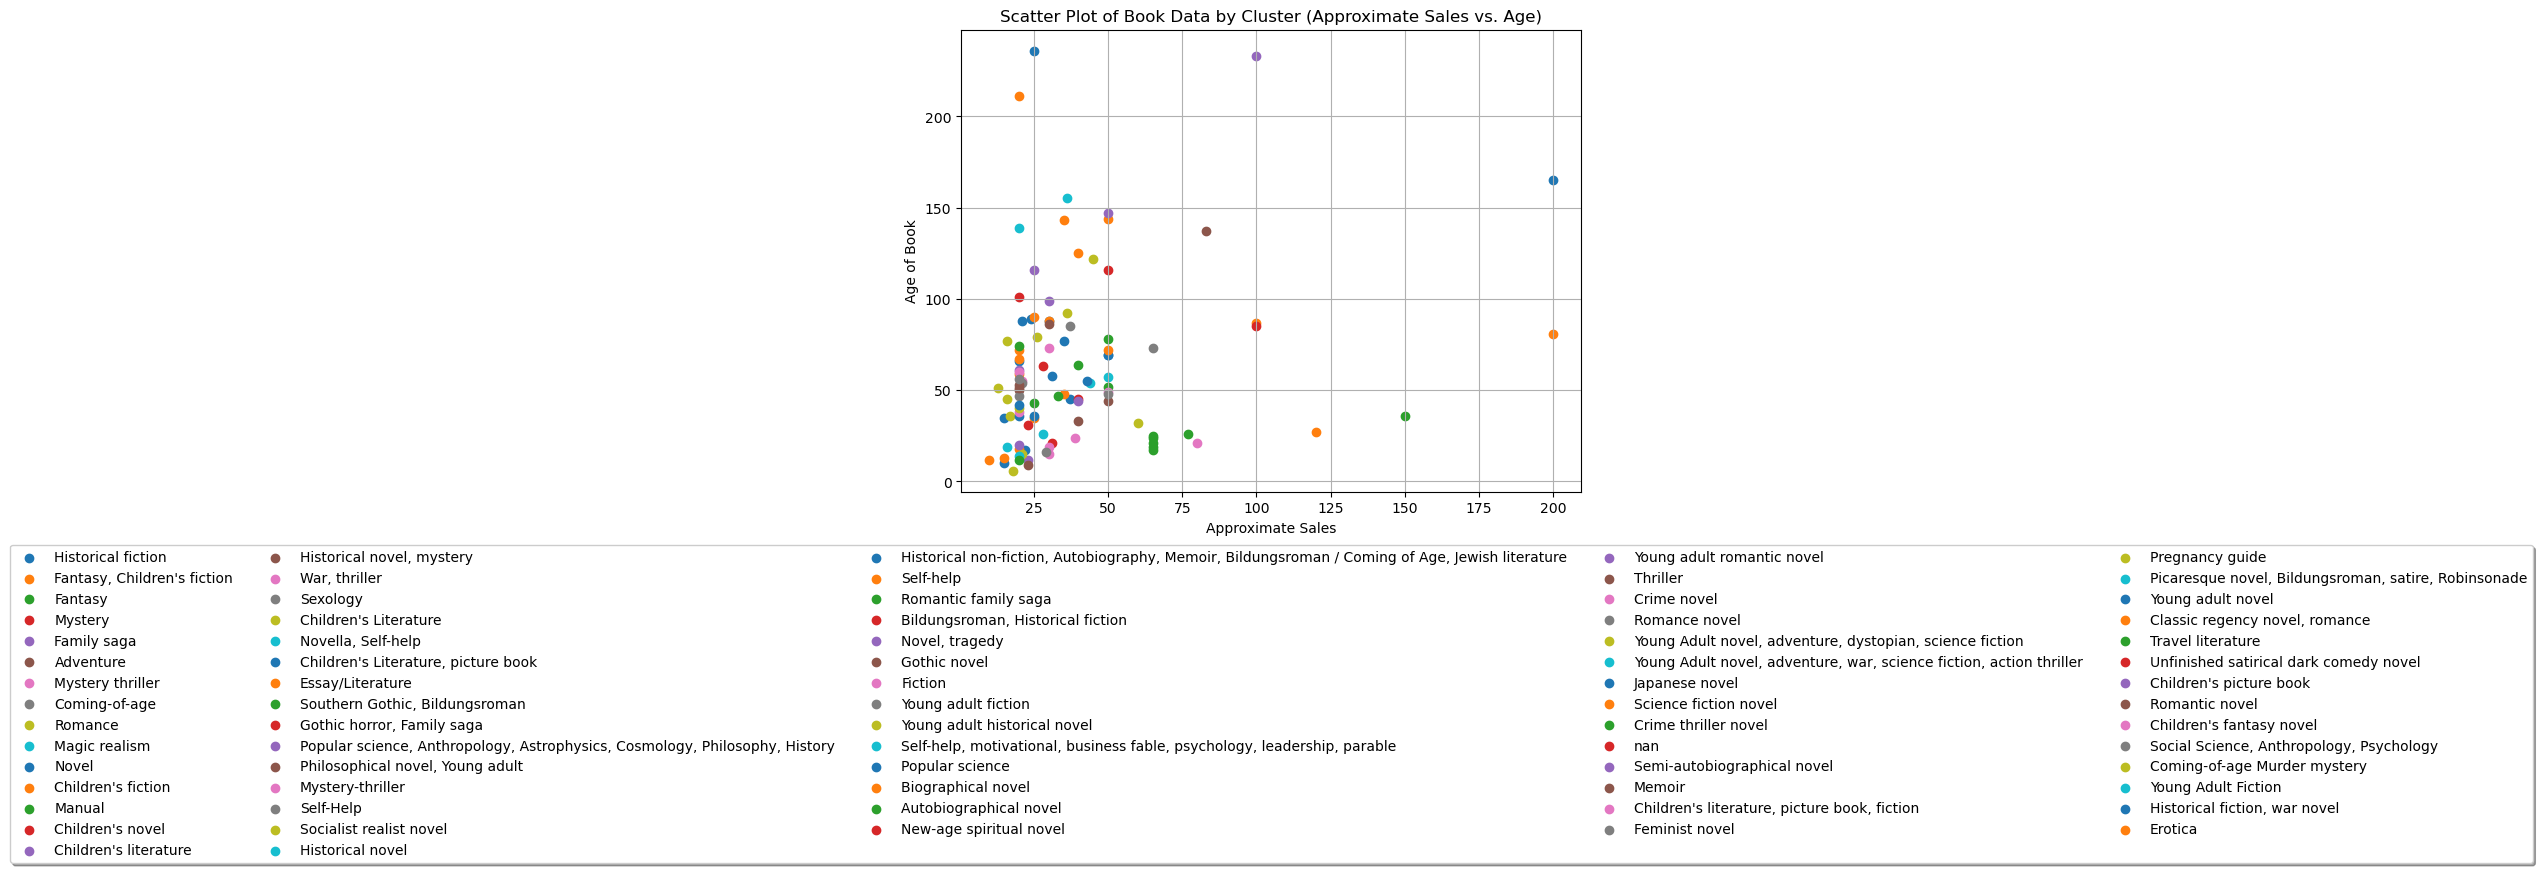

In [51]:
import matplotlib.pyplot as plt

# Select numerical attributes for the scatter plot
numerical_attributes = ['Approximate Sales', 'Age of Book']

# Assuming 'Genre' is the column containing cluster labels
cluster_labels = df['Genre']

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
for cluster in cluster_labels.unique():
    data_subset = df[df['Genre'] == cluster]
    plt.scatter(data_subset[numerical_attributes[0]], data_subset[numerical_attributes[1]], label=cluster)

# Add labels and title
plt.xlabel(numerical_attributes[0])
plt.ylabel(numerical_attributes[1])
plt.title('Scatter Plot of Book Data by Cluster (Approximate Sales vs. Age)')

# Adjust legend position to below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=5)

# Show the plot
plt.grid(True)
plt.show()


## Classification Plot

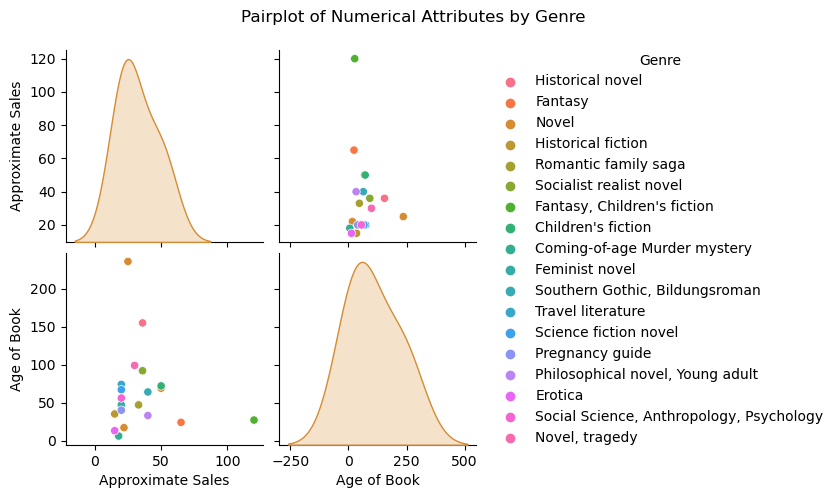

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


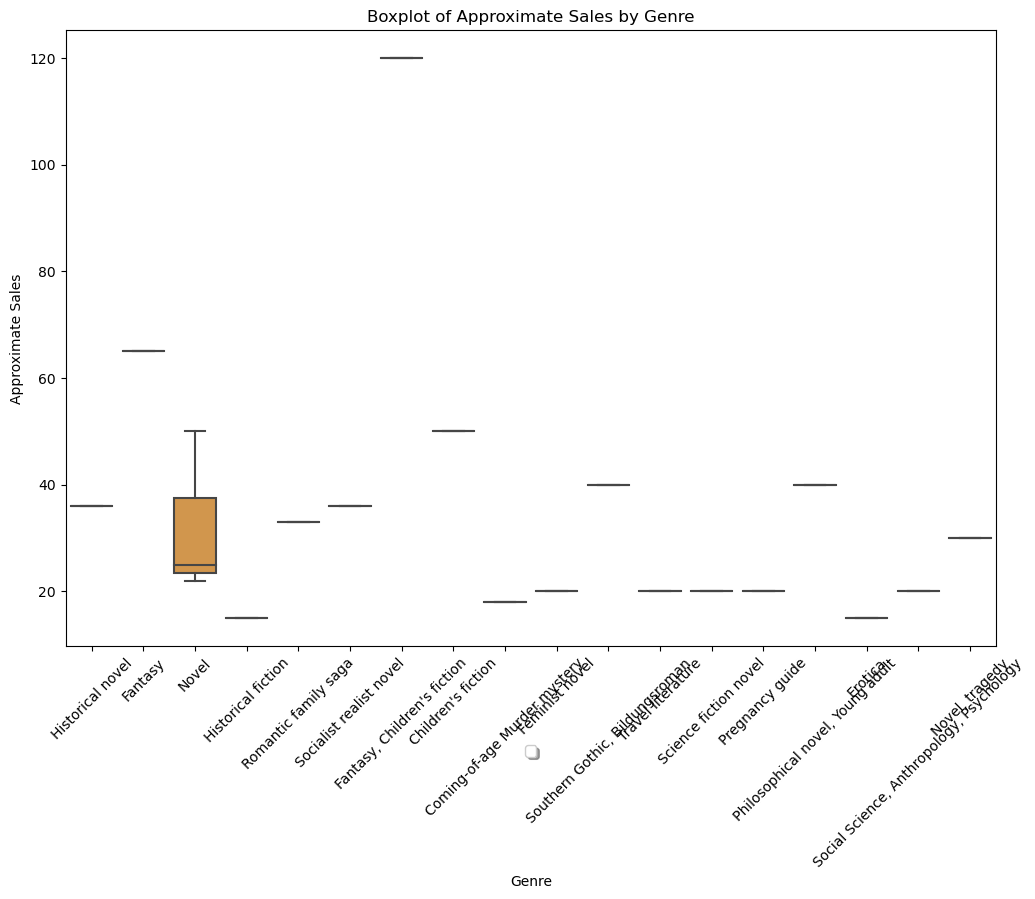

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


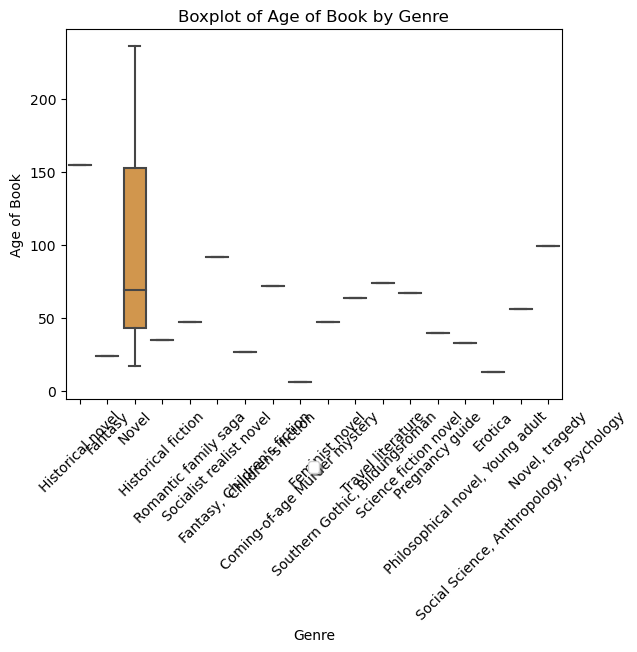

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_attributes = ['Approximate Sales', 'Age of Book']
categorical_attributes = ['Book', 'Author', 'Original Language', 'Genre']


data = df.sample(n=70)  
pairplot = sns.pairplot(data, vars=numerical_attributes, hue='Genre', markers='o')


pairplot.fig.subplots_adjust(top=0.9)  
pairplot.fig.suptitle('Pairplot of Numerical Attributes by Genre')

plt.show()

plt.figure(figsize=(12, 8))  
for num_attr in numerical_attributes:
    sns.boxplot(x='Genre', y=num_attr, data=data)
    plt.title(f'Boxplot of {num_attr} by Genre')
    plt.xticks(rotation=45)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)  
    plt.show()


## Filter

In [43]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Assuming your data is loaded into a DataFrame named 'df_encoded'
# Separate features and target variable
X = df_encoded.drop("Approximate Sales", axis=1)
y = df_encoded["Approximate Sales"]

# Feature selection with SelectKBest and chi-square
selector = SelectKBest(chi2, k=10)  # Select top 10 features
selector.fit(X, y)

# Get selected feature indices (to avoid indexing errors)
selected_feature_indices = selector.get_support(indices=True)

# Filter features using selected indices
X_filtered_filter = X.iloc[:, selected_feature_indices]

# Now you have filtered features in X_filtered_filter


In [63]:
X_filtered_filter

,Age of Book,category__Matilda,category__The Shack,category__Where the Crawdads Sing,category__Delia Owens,category__Mikhail Sholokhov,category__William P. Young,category__Coming-of-age Murder mystery,category__Young adult fiction,category__Young adult historical novel
0,165.0,0,0,0,0,0,0,0,0,0
1,81.0,0,0,0,0,0,0,0,0,0
2,36.0,0,0,0,0,0,0,0,0,0
3,27.0,0,0,0,0,0,0,0,0,0
4,85.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
284,0.0,0,0,0,0,0,0,0,0,0
285,0.0,0,0,0,0,0,0,0,0,0
286,0.0,0,0,0,0,0,0,0,0,0
287,0.0,0,0,0,0,0,0,0,0,0


## Wrapper

In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
selector = RFE(model, n_features_to_select=10, step=1)  
selector.fit(X, y)
selected_features_mask = selector.support_
selected_feature_indices = np.where(selected_features_mask)[0].tolist()
X_filtered_wrapper = X.iloc[:, selected_feature_indices]  
print(f"Features selected by RFE: {list(df_encoded.columns)[1:][selected_feature_indices]}")


TypeError: list indices must be integers or slices, not list

## One hot encoding

In [18]:
import pandas as pd

categorical_cols = ['Book', 'Author',"Original Language", "Genre"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix="category_", drop_first=True)


In [21]:
df_encoded.head()

,Approximate Sales,Age of Book,category__A Child's First Library of Learning,category__A Message to Garcia,category__A Series of Unfortunate Events,category__A Song of Ice and Fire,category__A Tale of Two Cities,category__Adventures of Huckleberry Finn,category__Alcoholics Anonymous,category__Alex Cross,...,"category__War, thriller",category__Young Adult Fiction,"category__Young Adult novel, adventure, dystopian, science fiction","category__Young Adult novel, adventure, war, science fiction, action thriller",category__Young adult fiction,category__Young adult historical novel,category__Young adult novel,category__Young adult romantic novel,category__more than 20 million[286][287],category__more than 20 million[288][289]
0,200,165.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200,81.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,150,36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,120,27.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,100,85.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_encoded.shape

(289, 757)

## PCA(tried)

In [29]:
import pandas as pd
from sklearn.decomposition import PCA
X = df_encoded
n_components = 100
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)

In [30]:
X_reduced.shape

(289, 100)

In [62]:
X_reduced

array([[-6.82969905e+02,  1.14212322e+02, -4.48299843e-01, ...,
         1.09884096e-01, -1.06803502e-01,  2.36036832e-02],
       [-6.80583675e+02,  3.02487294e+01,  7.33736856e-01, ...,
         2.33849845e-02, -3.12580013e-03,  5.64502166e-02],
       [-7.29285200e+02, -1.61555312e+01,  6.90693384e-01, ...,
         1.43400789e-02, -1.06514565e-01, -1.50084252e-03],
       ...,
       [ 1.10299812e+03, -1.00146138e-01, -3.69925008e-01, ...,
         2.58106666e-03,  2.17113256e-01,  3.34049567e-01],
       [ 1.11199448e+03,  1.55517672e-01, -3.70901385e-01, ...,
         1.20152854e-01, -4.02346005e-02,  6.41907768e-02],
       [ 1.11099493e+03,  1.28729786e-01,  5.72002693e-01, ...,
         1.37311898e-03,  6.35287584e-04,  6.35511646e-03]])